# **Step 1 : Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix , precision_score,  recall_score, auc,roc_curve,accuracy_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from tabulate import tabulate

import warnings as warn
from warnings import filterwarnings

filterwarnings("ignore")

# **Step 2 : Read Dataset**

In [ ]:
 data = pd.read_csv("/content/IRIS Flower  Dataset.csv")
df = pd.DataFrame(data)

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
195,6.74,3.21,4.58,1.29,Iris-versicolor
196,6.83,3.28,4.61,1.27,Iris-versicolor
197,6.92,3.35,4.63,1.26,Iris-versicolor
198,7.01,3.43,4.65,1.24,Iris-versicolor
199,7.10,3.50,4.68,1.23,Iris-versicolor


In [ ]:
df["species"].replace({"Iris-setosa":0 , "Iris-versicolor":1 , "Iris-virginica":2} , inplace = True)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10,3.50,1.40,0.20,0
1,4.90,3.00,1.40,0.20,0
2,4.70,3.20,1.30,0.20,0
3,4.60,3.10,1.50,0.20,0
4,5.00,3.60,1.40,0.20,0
...,...,...,...,...,...
195,6.74,3.21,4.58,1.29,1
196,6.83,3.28,4.61,1.27,1
197,6.92,3.35,4.63,1.26,1
198,7.01,3.43,4.65,1.24,1


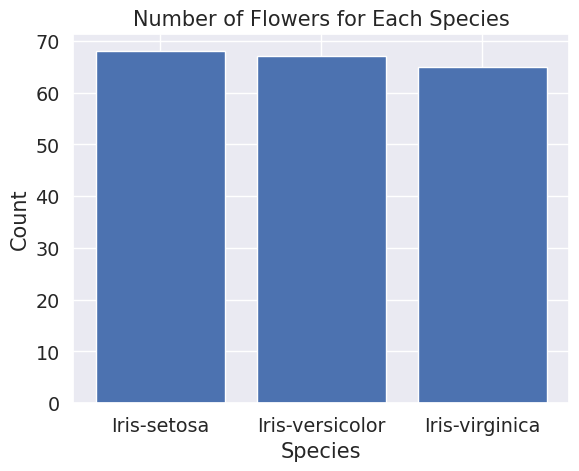

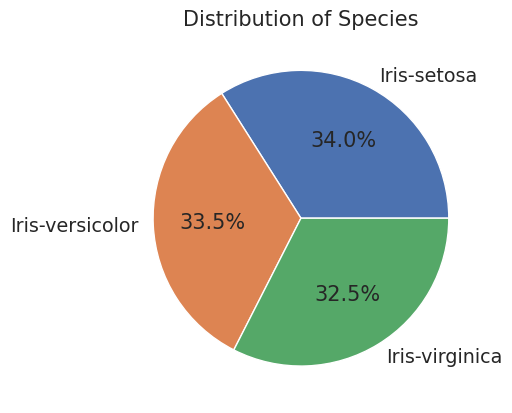

In [ ]:
import matplotlib.pyplot as plt
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
counts = df['species'].value_counts()
plt.bar(species, counts)
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Number of Flowers for Each Species')
plt.show()
plt.pie(counts, labels=species, autopct='%1.1f%%')
plt.title('Distribution of Species')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Step 3 : Dataset Overview**

In [ ]:
df.describe(include = 'all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,200.000000,200.000000,200.00000,200.000000,200.00000
mean,5.712250,2.970600,3.71295,1.214950,1.00500
std,1.046976,0.505994,1.79252,0.785461,0.82363
min,1.900000,0.980000,0.62000,0.100000,0.00000
25%,5.100000,2.800000,1.50000,0.200000,0.00000
50%,5.900000,3.000000,4.45000,1.300000,1.00000
75%,6.400000,3.200000,5.16000,1.900000,2.00000
max,7.900000,4.400000,6.90000,2.500000,2.00000


A **correlation heatmap** is a heatmap that shows a 2D correlation matrix between two discrete dimensions, using colored cells to represent data from usually a monochromatic scale. The values of the first dimension appear as the rows of the table while of the second dimension as a column. The color of the cell is proportional to the number of measurements that match the dimensional value. This makes correlation heatmaps ideal for data analysis since it makes patterns easily readable and highlights the differences and variation in the same data. A correlation heatmap, like a regular heatmap is assisted by a colorbar making data easily readable and comprehensible.

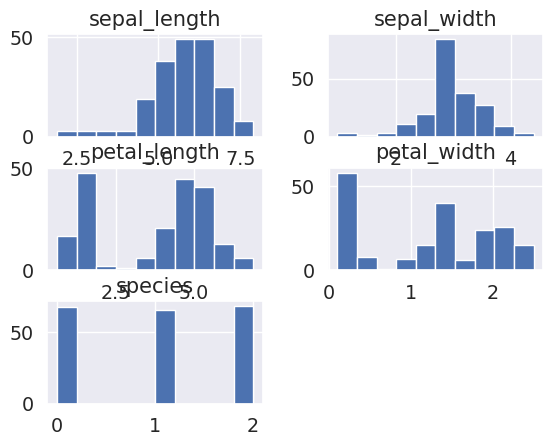

In [ ]:
df.hist()
plt.show()

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

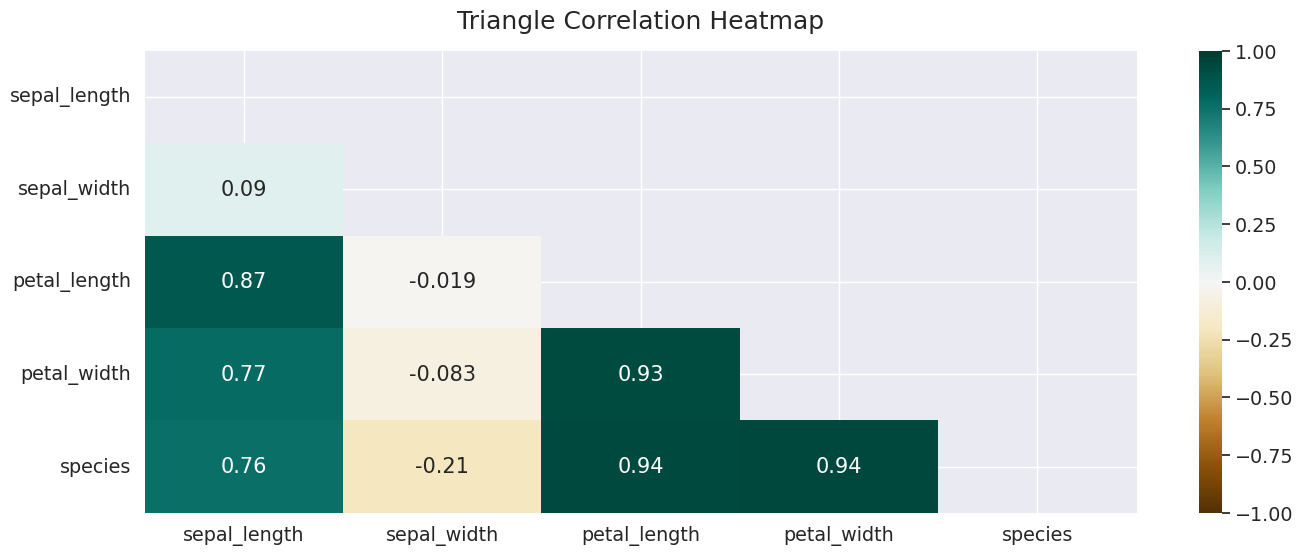

In [ ]:
plt.figure (figsize = (16 , 6))

mask = np.triu(np.ones_like(df.corr(method = "spearman") , dtype = bool))
heatmap = sns.heatmap(df.corr(method = "spearman") , mask = mask , vmin = -1 , vmax = 1 ,
                      annot = True , cmap="BrBG")
heatmap.set_title("Triangle Correlation Heatmap" , fontdict = {'fontsize': 18} , pad =16 )

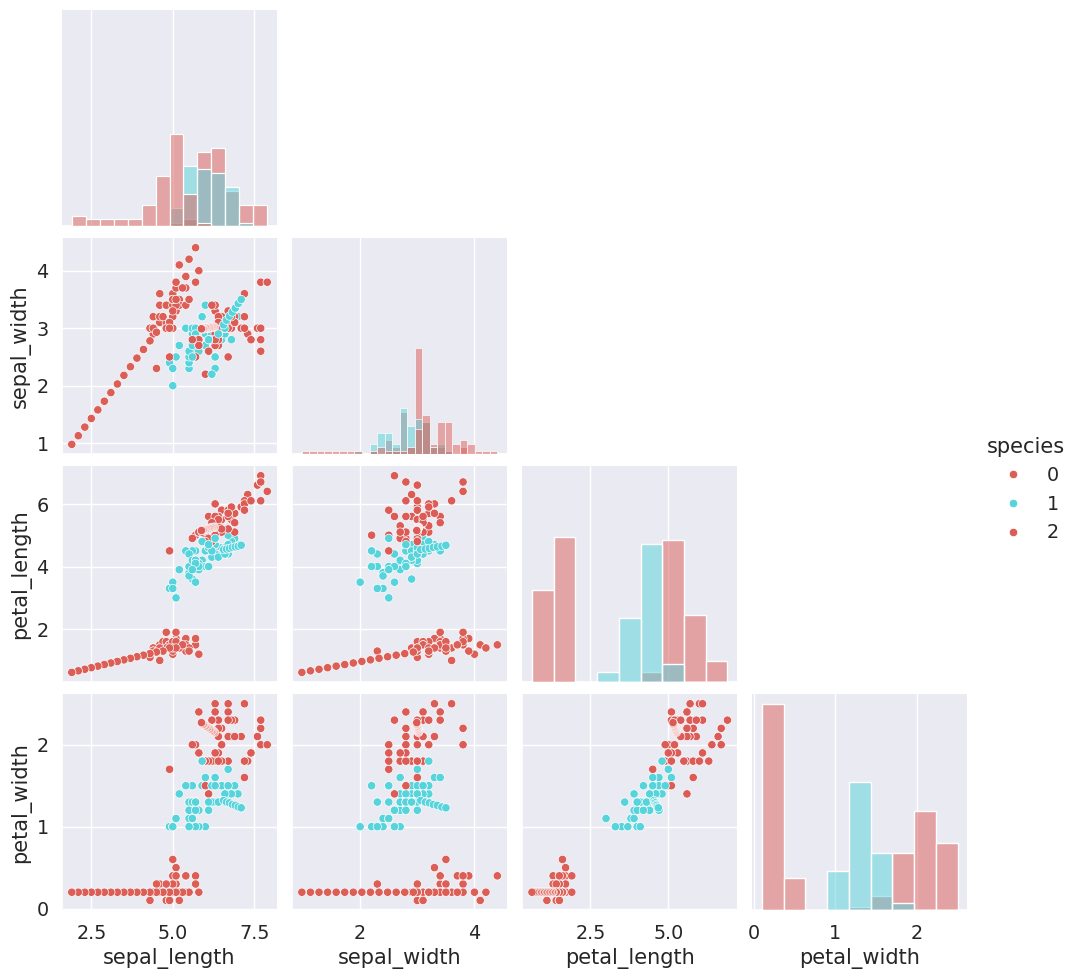

In [ ]:
sns.pairplot(df , hue='species' , diag_kind="hist" , corner=True , palette = 'hls')
#hist - Histogram
#hls - Hue, lightroom, Saturation

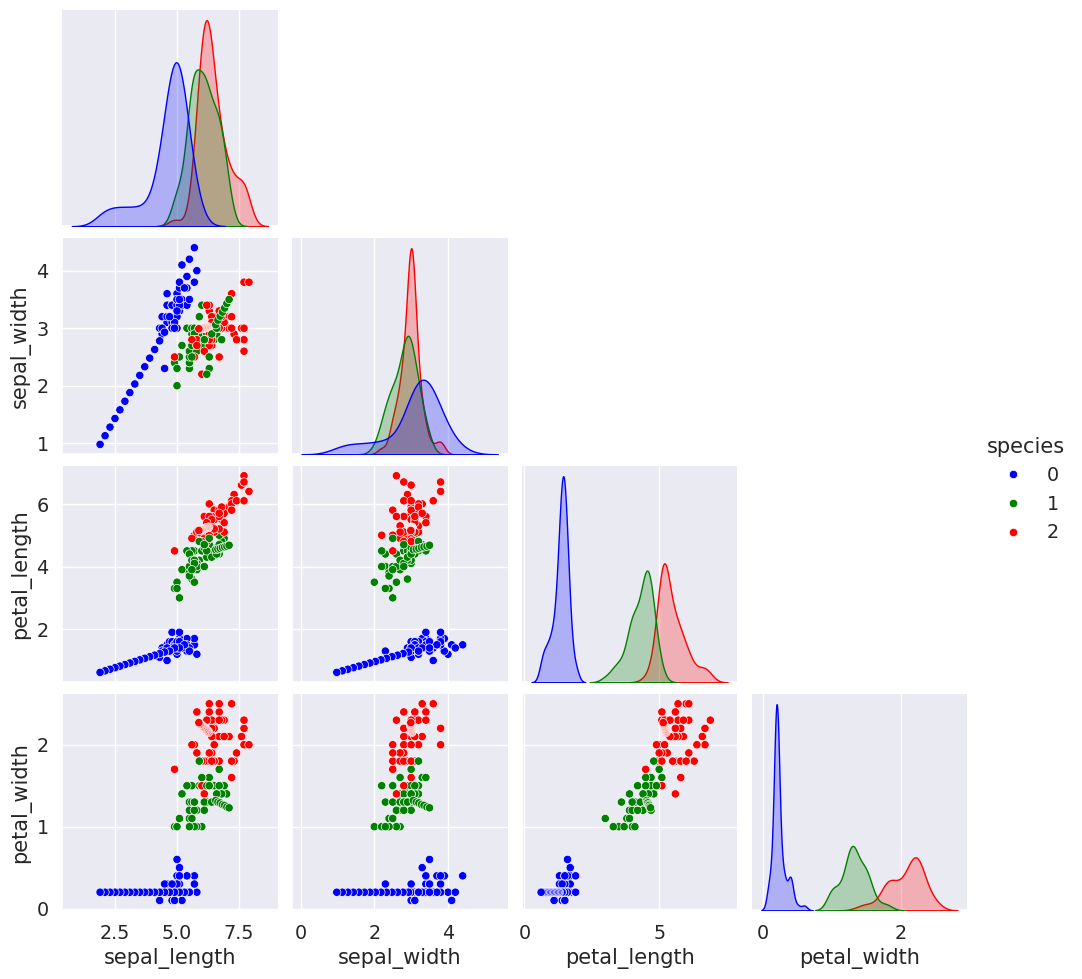

In [ ]:
sns.pairplot(df , hue='species' , diag_kind="kde" , corner=True , palette = ['blue','green','red'])
#kde means Kernal desnity estimation plot

# **Step 4 : Data science & Visualization**

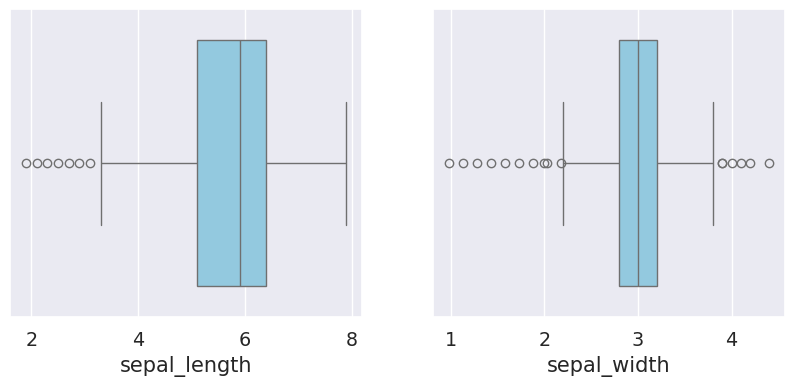

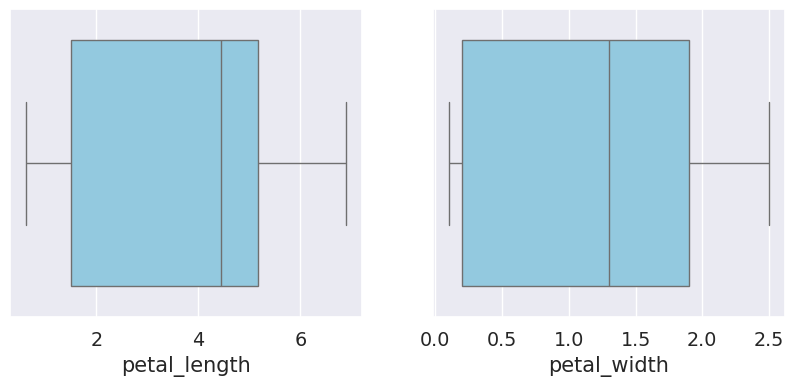

In [ ]:
Num = ['sepal_length' , 'sepal_width' , 'petal_length' , 'petal_width']

j = 0
while j < 5:
    fig = plt.figure (figsize = [10 , 4])
    plt.subplot(1, 2, 1)
    sns.boxplot (x = Num[j] , data = df , color='skyblue')
    sns.set(font_scale=1.25)
    j += 1
    plt.subplot(1, 2, 2)
    sns.boxplot (x = Num[j] , data = df , color='skyblue')
    sns.set(font_scale=1.25)
    j += 1
    if j == 4:
        break
    plt.show()

<Axes: xlabel='species', ylabel='count'>

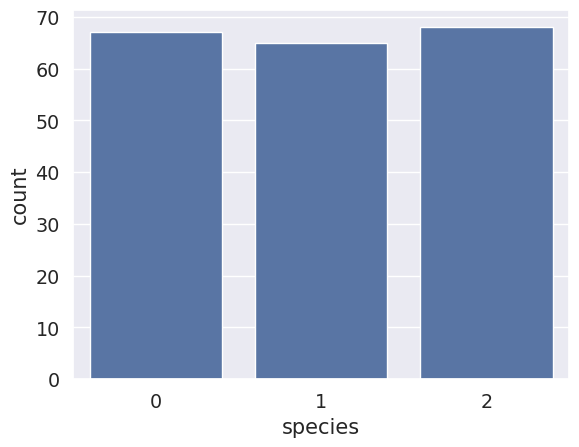

In [ ]:
sns.countplot(x = df['species'] , data = df)

# **Step 5 : Models**

In [ ]:
X = pd.DataFrame(df , columns = ["sepal_length" , "sepal_width" , "petal_length" , "petal_width"])
y = df["species"].values.reshape(-1,1)

In [ ]:
Scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
Norm1 = Scaler.fit_transform(df)
Norm1_df=pd.DataFrame (Norm1 , columns = ["species" , "sepal_length" , "sepal_width" , "petal_length" , "petal_width"])
Norm1_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,0.533333,0.736842,0.124204,0.041667,0.0
1,0.500000,0.590643,0.124204,0.041667,0.0
2,0.466667,0.649123,0.108280,0.041667,0.0
3,0.450000,0.619883,0.140127,0.041667,0.0
4,0.516667,0.766082,0.124204,0.041667,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.5 , random_state = 0)

In [ ]:
def Evaluate_Performance(Model, Xtrain, Xtest, Ytrain, Ytest) :
    Model.fit(Xtrain,Ytrain)
    overall_score = cross_val_score(Model, Xtrain,Ytrain, cv=10)
    model_score = np.average(overall_score)
    Ypredicted = Model.predict(Xtest)
    avg = 'weighted'
    print("\n • Training Accuracy Score : ", round(Model.score(Xtrain, Ytrain) * 100,2))
    print(f" • Cross Validation Score : {round(model_score * 100,2)}")
    print(f" • Testing Accuracy Score :{round(accuracy_score(Ytest, Ypredicted) * 100,2)}")
    print(f" • Precision Score is : {np.round(precision_score(Ytest, Ypredicted , average=avg) * 100,2)}")
    print(f" • Recall Score is : {np.round(recall_score(Ytest, Ypredicted , average=avg) * 100,2)}")
    print(f" • F1-Score Score is : {np.round(f1_score(Ytest, Ypredicted , average=avg) * 100,2)}")

# **Logestic Regression**

Logistic Regression : 

 • Training Accuracy Score :  97.0
 • Cross Validation Score : 96.0
 • Testing Accuracy Score :96.0
 • Precision Score is : 96.0
 • Recall Score is : 96.0
 • F1-Score Score is : 96.0


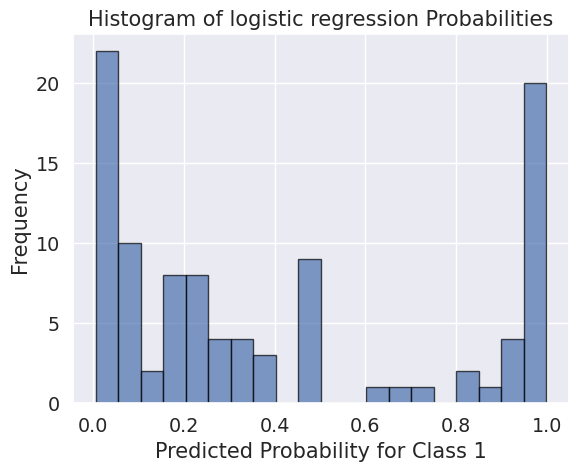

In [ ]:

LogReg = LogisticRegression(solver = "liblinear" , C=50)
LogReg.fit(X_train , y_train.ravel())
y_pred_LR = LogReg.predict(X_test)
print("Logistic Regression : ")
Evaluate_Performance(LogReg, X_train, X_test, y_train, y_test)

import matplotlib.pyplot as plt
predicted_probabilities = LogReg.predict_proba(X_test)
positive_probabilities = predicted_probabilities[:, 1]
plt.hist(positive_probabilities, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Predicted Probability for Class 1')
plt.ylabel('Frequency')
plt.title('Histogram of logistic regression Probabilities')
plt.show()


In [ ]:
kfold = KFold(37)
LR_r = cross_val_score (LogReg, X, y, cv = kfold)
print(np.std(LR_r))

0.0866271378828513


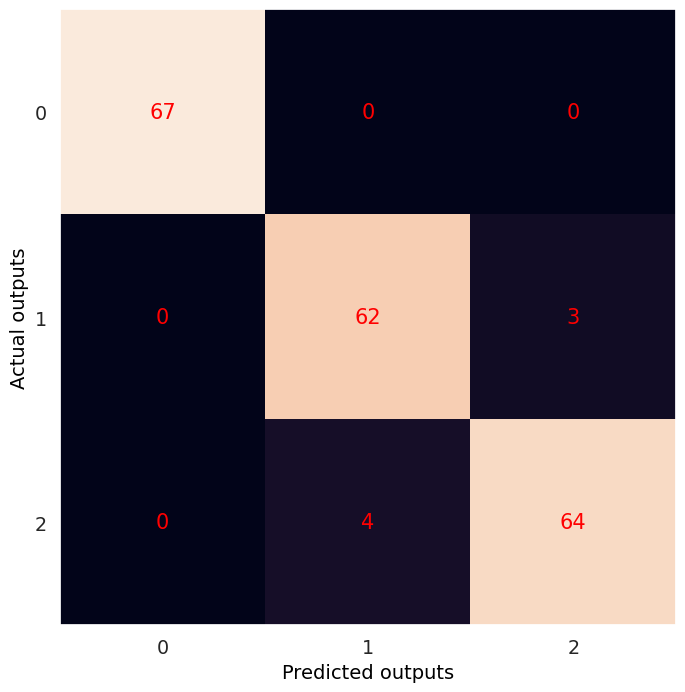

In [ ]:
cm = confusion_matrix (y , LogReg.predict(X))

fig, ax = plt.subplots (figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5 , -0.5)

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')

plt.show()

# **K Nearest Neighbors**

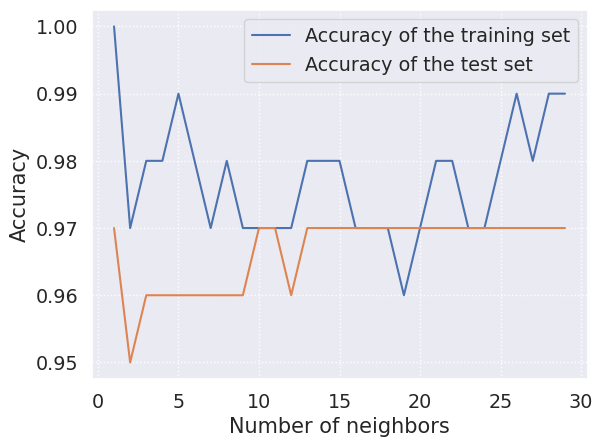

In [ ]:
training_acc = []
test_acc = []

neighbors_setting = range(1,30)

for n_neighbors in neighbors_setting:
    KNN = KNeighborsClassifier(n_neighbors = n_neighbors)
    KNN.fit(X_train , y_train.ravel())
    training_acc.append(KNN.score(X_train , y_train))
    test_acc.append(KNN.score(X_test , y_test))

plt.plot(neighbors_setting , training_acc , label = "Accuracy of the training set")
plt.plot(neighbors_setting , test_acc , label = "Accuracy of the test set")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.grid(linestyle=':')
plt.legend()


In [ ]:
parameters = {"n_neighbors" : range(1,50)}
grid_kn = GridSearchCV(estimator = KNN , param_grid = parameters , scoring = "accuracy" , cv = 5 , verbose = 1 , n_jobs = -1)

grid_kn.fit(X_train , y_train.ravel())
grid_kn.best_params_

Fitting 5 folds for each of 49 candidates, totalling 245 fits


{'n_neighbors': 20}

K-Nearest Neighbors : 

 • Training Accuracy Score :  98.0
 • Cross Validation Score : 96.0
 • Testing Accuracy Score :96.0
 • Precision Score is : 96.0
 • Recall Score is : 96.0
 • F1-Score Score is : 96.0


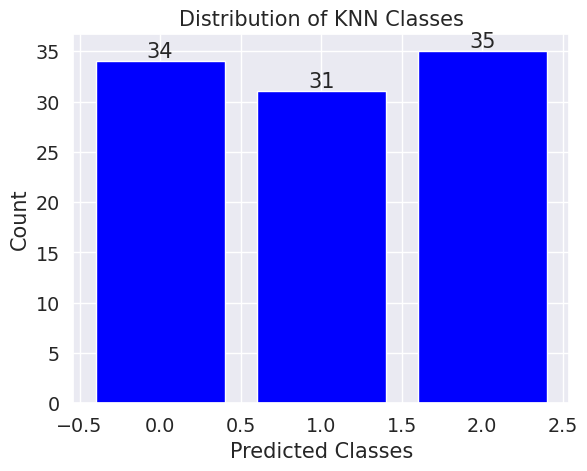

In [ ]:

K = 3
KNN = KNeighborsClassifier(K)
KNN.fit(X_train , y_train.ravel())
y_pred_KNN = KNN.predict(X_test)
print("K-Nearest Neighbors : ")
Evaluate_Performance(KNN, X_train, X_test, y_train, y_test)

import matplotlib.pyplot as plt
import numpy as np
unique, counts = np.unique(y_pred_KNN, return_counts=True)
plt.bar(unique, counts, color='blue')
plt.xlabel('Predicted Classes')
plt.ylabel('Count')
plt.title('Distribution of KNN Classes')
for i, count in enumerate(counts):
    plt.text(unique[i], count, str(count), ha='center', va='bottom')
plt.show()


In [ ]:
KNN_r = cross_val_score (KNN, X, y, cv = 10)
K = np.std(KNN_r)
print(K)

0.06103277807866852


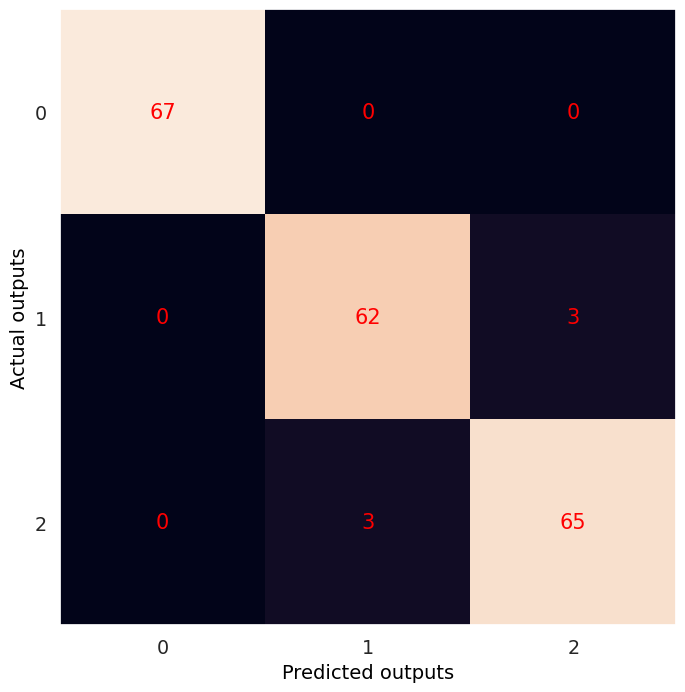

In [ ]:
cm = confusion_matrix (y , KNN.predict(X))

fig, ax = plt.subplots (figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5 , -0.5)

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')

plt.show()

# **Naive Bayes**

Naive Bayes : 

 • Training Accuracy Score :  96.0
 • Cross Validation Score : 96.0
 • Testing Accuracy Score :97.0
 • Precision Score is : 97.03
 • Recall Score is : 97.0
 • F1-Score Score is : 97.0


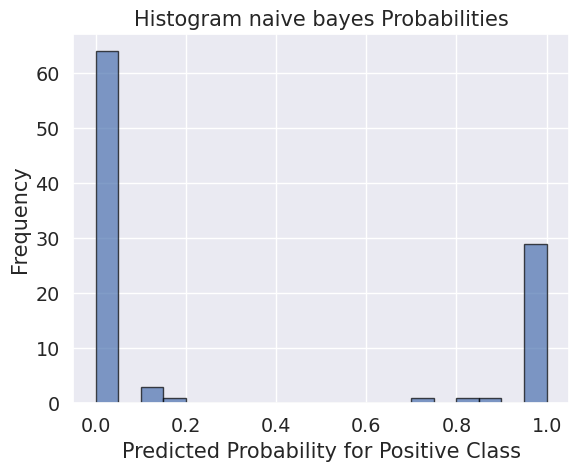

In [ ]:

NB = GaussianNB()
NB.fit(X_train , y_train.ravel())
y_pred_NB = NB.predict(X_test)
print("Naive Bayes : ")
Evaluate_Performance(NB, X_train, X_test, y_train, y_test)

import matplotlib.pyplot as plt
predicted_probabilities = NB.predict_proba(X_test)[:, 1]
plt.hist(predicted_probabilities, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Predicted Probability for Positive Class')
plt.ylabel('Frequency')
plt.title('Histogram naive bayes Probabilities')
plt.show()


In [ ]:
NB_r = cross_val_score (NB, X, y, cv = 10)
N = np.std(NB_r)
print(N)

0.03905124837953327


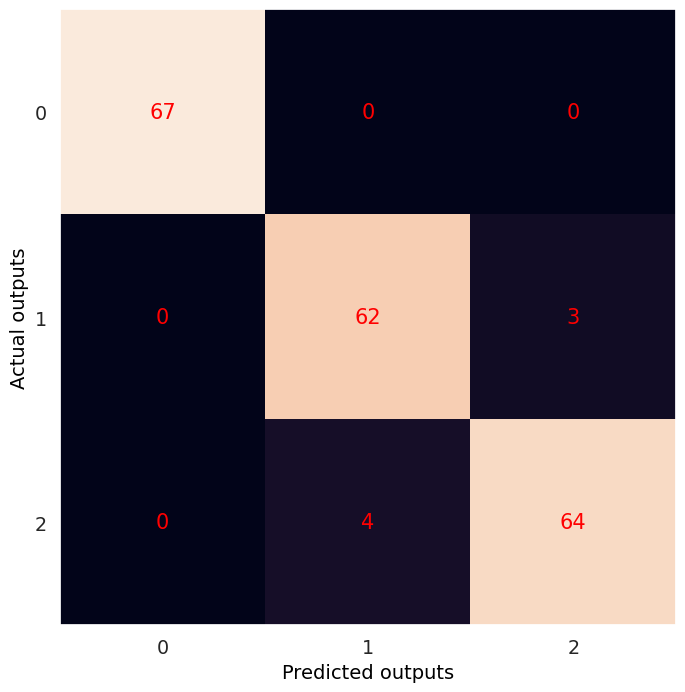

In [ ]:
cm = confusion_matrix (y , NB.predict(X))

fig, ax = plt.subplots (figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5 , -0.5)

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')

plt.show()

# **Support Vector Machine**

SVM : 

 • Training Accuracy Score :  97.0
 • Cross Validation Score : 97.0
 • Testing Accuracy Score :97.0
 • Precision Score is : 97.02
 • Recall Score is : 97.0
 • F1-Score Score is : 97.0


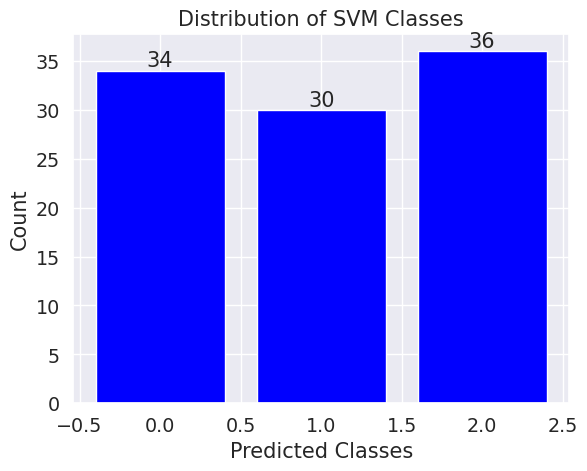

In [ ]:

SVM = SVC()
SVM.fit(X_train , y_train)
y_pred_SVM = SVM.predict(X_test)
print("SVM : ")
Evaluate_Performance(SVM, X_train, X_test, y_train, y_test)

import matplotlib.pyplot as plt
import numpy as np
unique, counts = np.unique(y_pred_SVM, return_counts=True)
plt.bar(unique, counts, color='blue')
plt.xlabel('Predicted Classes')
plt.ylabel('Count')
plt.title('Distribution of SVM Classes')
for i, count in enumerate(counts):
    plt.text(unique[i], count, str(count), ha='center', va='bottom')
plt.show()


In [ ]:
SVM_r = cross_val_score (SVM, X, y, cv = 10)
S = np.std(SVM_r)
print(S)

0.033166247903554005


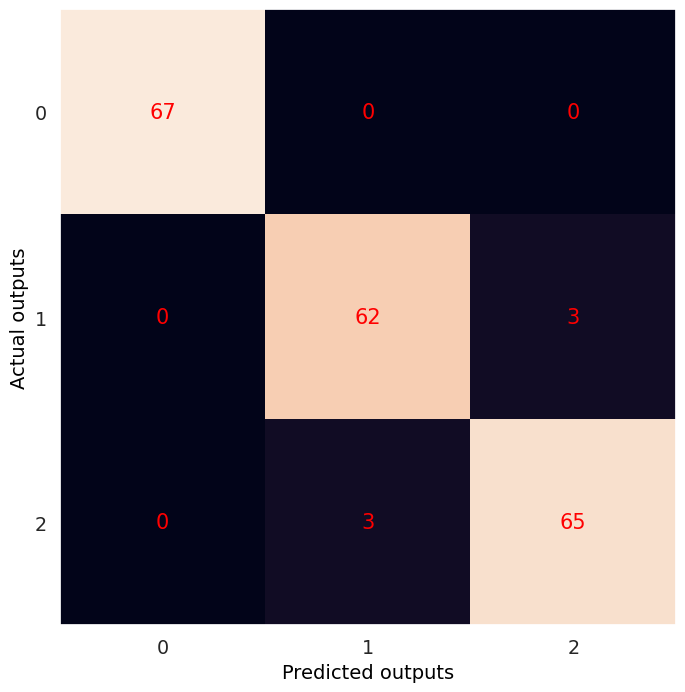

In [ ]:
cm = confusion_matrix (y , SVM.predict(X))

fig, ax = plt.subplots (figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5 , -0.5)

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')

plt.show()

# **Decision Tree**

Decision Tree : 

 • Training Accuracy Score :  98.0
 • Cross Validation Score : 93.0
 • Testing Accuracy Score :95.0
 • Precision Score is : 95.69
 • Recall Score is : 95.0
 • F1-Score Score is : 94.99


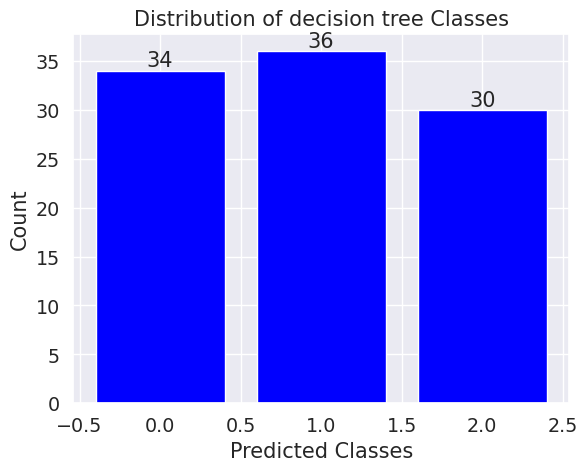

In [ ]:


DT = DecisionTreeClassifier(max_depth = 3)
DT = DT.fit(X_train , y_train)
y_pred_DT = DT.predict(X_test)
print("Decision Tree : ")
Evaluate_Performance(DT, X_train, X_test, y_train, y_test)

import matplotlib.pyplot as plt
import numpy as np
unique, counts = np.unique(y_pred_DT, return_counts=True)
plt.bar(unique, counts, color='blue')
plt.xlabel('Predicted Classes')
plt.ylabel('Count')
plt.title('Distribution of decision tree Classes')
for i, count in enumerate(counts):
    plt.text(unique[i], count, str(count), ha='center', va='bottom')
plt.show()


By performing cross-validation and calculating the standard deviation of the scores, you can get a better understanding of how well the model performs on unseen data and how sensitive it is to variations in the training data.

A lower standard deviation indicates that the model is less sensitive to the specific folds used for training and testing, suggesting that it is more likely to perform consistently on new data. Conversely, a higher standard deviation suggests that the model's performance may vary more depending on the specific data used for training and testing.

In [ ]:
DT_r = cross_val_score (DT, X, y, cv = 10)
D = np.std(DT_r)
print(D)

0.03905124837953327


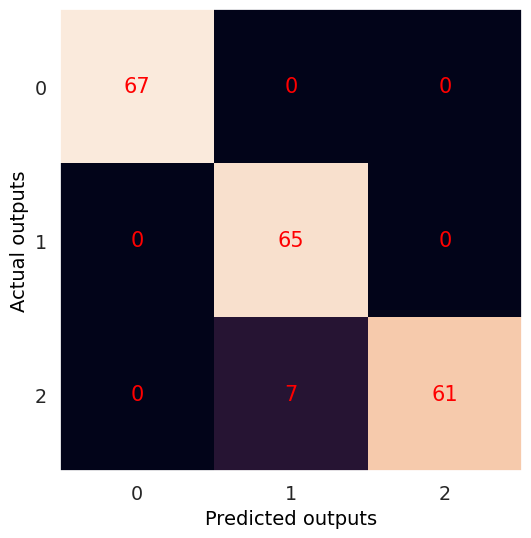

In [ ]:
cm = confusion_matrix (y , DT.predict(X))

fig, ax = plt.subplots (figsize = (6, 6))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5 , -0.5)

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')

plt.show()

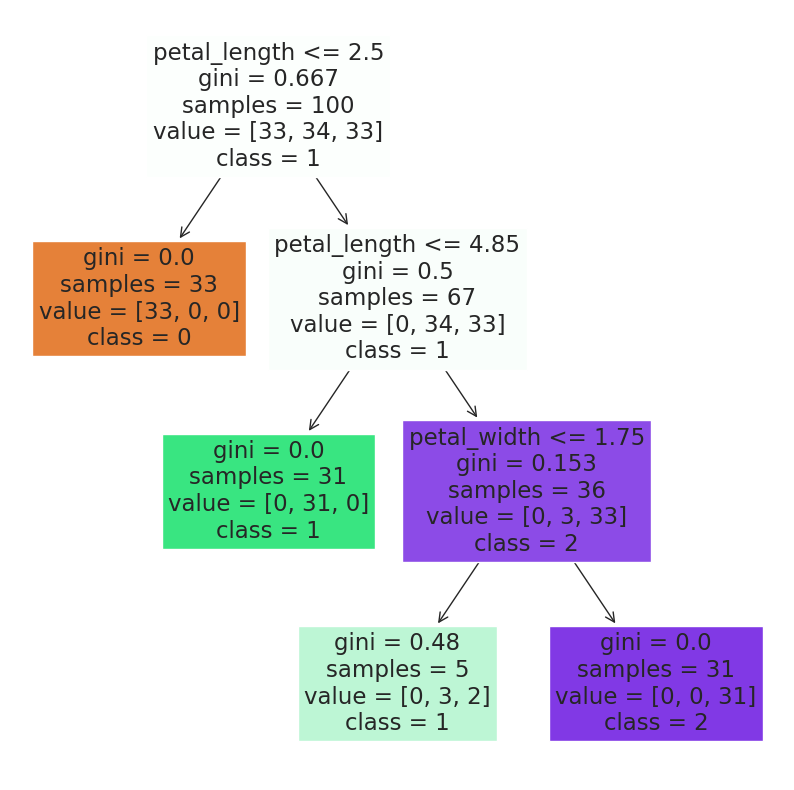

In [ ]:
F = ["sepal_length" , "sepal_width" , "petal_length" , "petal_width"]
T = ['0' , '1' , '2']
fig = plt.figure(figsize = (10 , 10))
plot = tree.plot_tree (DT , feature_names = F , class_names = T , filled = True)

# **Random Forest**

Random Forest : 

 • Training Accuracy Score :  99.0
 • Cross Validation Score : 96.0
 • Testing Accuracy Score :96.0
 • Precision Score is : 96.12
 • Recall Score is : 96.0
 • F1-Score Score is : 96.0


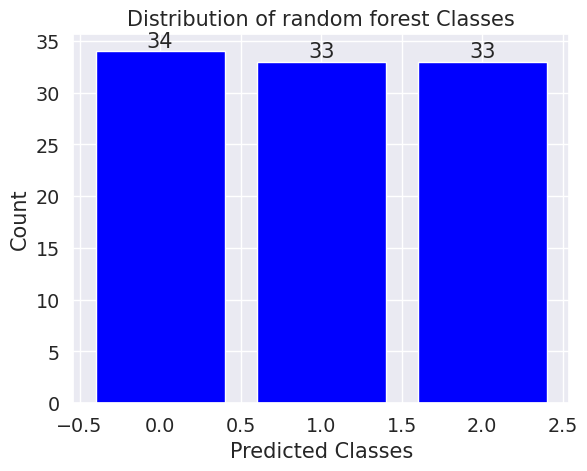

In [ ]:

RF = RandomForestClassifier(n_estimators = 400, max_depth = 3)
RF = RF.fit(X_train , y_train)
y_pred_RF = RF.predict(X_test)
print("Random Forest : ")
Evaluate_Performance(RF, X_train, X_test, y_train, y_test)

import matplotlib.pyplot as plt
import numpy as np
unique, counts = np.unique(y_pred_RF, return_counts=True)
plt.bar(unique, counts, color='blue')
plt.xlabel('Predicted Classes')
plt.ylabel('Count')
plt.title('Distribution of random forest Classes')
for i, count in enumerate(counts):
    plt.text(unique[i], count, str(count), ha='center', va='bottom')
plt.show()


In [ ]:
RF_r = cross_val_score (RF, X, y, cv = 10)
R = np.std(RF_r)
print(R)

0.03905124837953327


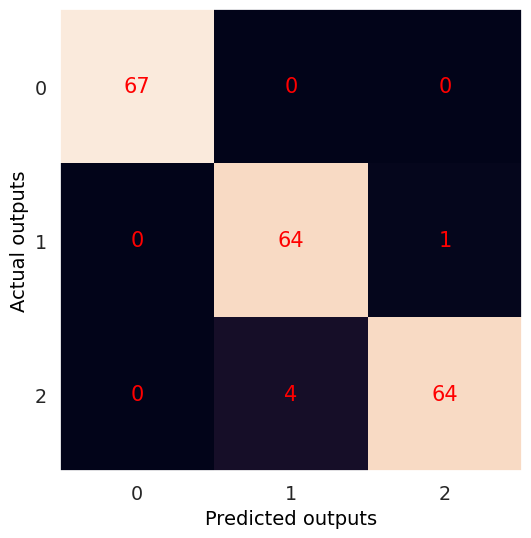

In [ ]:
cm = confusion_matrix (y , RF.predict(X))

fig, ax = plt.subplots (figsize = (6, 6))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5 , -0.5)

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')

plt.show()

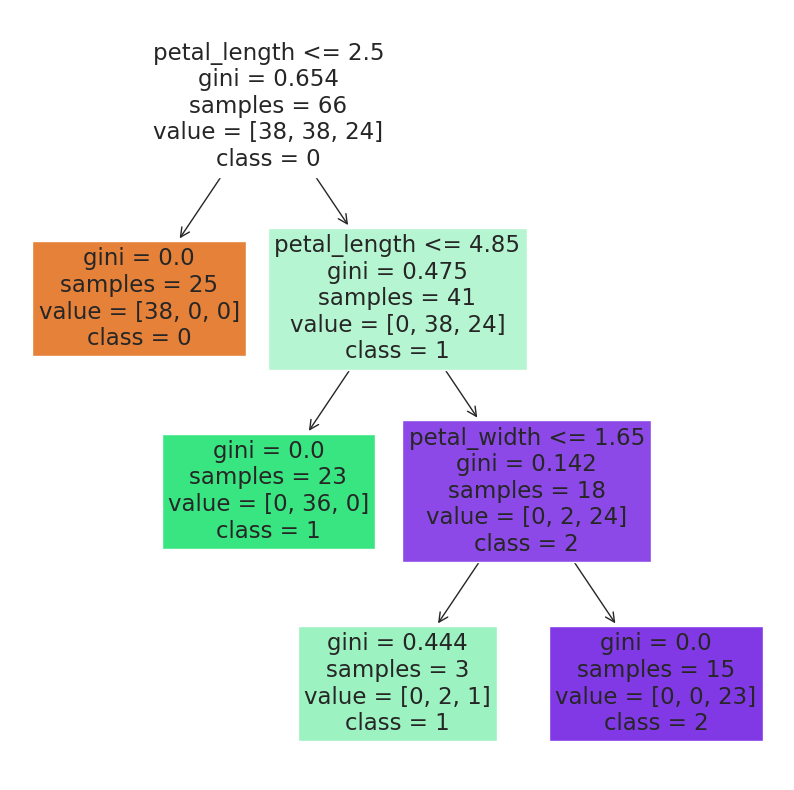

In [ ]:
#white box one
F = ["sepal_length" , "sepal_width" , "petal_length" , "petal_width"]
T = ['0' , '1' , '2']
fig = plt.figure(figsize = (10 , 10))
plot = tree.plot_tree (RF.estimators_[5] , feature_names = F , class_names = T , filled = True)

# **Step 6 : Conclusion**

In [ ]:
models = pd.DataFrame ({'Model' : ['Logestic Regression' , ' KNN' , 'Naive Bayes' , 'SVM' , 'Decision Tree' , 'Random Forest'] ,
                        'Precision' : [precision_score(y_test, y_pred_LR, average='weighted') , precision_score(y_test, y_pred_KNN, average='weighted') , precision_score(y_test, y_pred_NB, average='weighted') , precision_score(y_test, y_pred_SVM, average='weighted') , precision_score(y_test, y_pred_DT, average='weighted') , precision_score(y_test, y_pred_RF, average='weighted')] ,
                        'Recall' : [recall_score(y_test, y_pred_LR, average='weighted') , recall_score(y_test, y_pred_KNN, average='weighted') , recall_score(y_test, y_pred_NB, average='weighted') , recall_score(y_test, y_pred_SVM, average='weighted') , recall_score(y_test, y_pred_DT, average='weighted') , recall_score(y_test, y_pred_RF, average='weighted')] ,
                        'F1-score' : [f1_score(y_test, y_pred_LR, average='weighted') , f1_score(y_test, y_pred_KNN, average='weighted') , f1_score(y_test, y_pred_NB, average='weighted') , f1_score(y_test, y_pred_SVM, average='weighted') , f1_score(y_test, y_pred_DT, average='weighted') , f1_score(y_test, y_pred_RF, average='weighted')] ,
                        'Accuracy' : [accuracy_score(y_test, y_pred_LR) , accuracy_score(y_test, y_pred_KNN) , accuracy_score(y_test, y_pred_NB) , accuracy_score(y_test, y_pred_SVM) , accuracy_score(y_test, y_pred_DT) , accuracy_score(y_test, y_pred_RF)],
                        'Err' : [np.std(LR_r) , np.std(KNN_r) , np.std(NB_r) , np.std(SVM_r) , np.std(DT_r) , np.std(RF_r)]})

print(tabulate(models, headers='keys', tablefmt='rst'))

====  ===================  ===========  ========  ==========  ==========  =========
  ..  Model                  Precision    Recall    F1-score    Accuracy        Err
====  ===================  ===========  ========  ==========  ==========  =========
   0  Logestic Regression     0.96          0.96    0.96            0.96  0.0866271
   1  KNN                     0.96          0.96    0.96            0.96  0.0610328
   2  Naive Bayes             0.970331      0.97    0.970021        0.97  0.0390512
   3  SVM                     0.970222      0.97    0.969965        0.97  0.0331662
   4  Decision Tree           0.956944      0.95    0.949943        0.95  0.0390512
   5  Random Forest           0.961212      0.96    0.960037        0.96  0.0390512
====  ===================  ===========  ========  ==========  ==========  =========


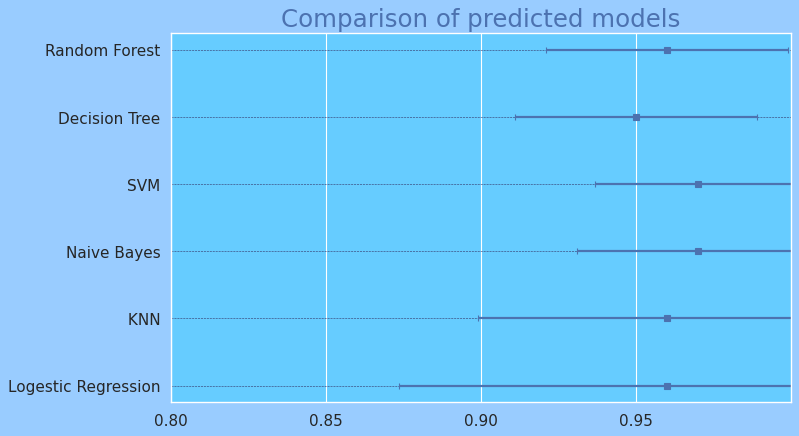

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6), dpi= 80, facecolor='#99ccff')

ax.set_facecolor('#66ccff')

ax.set_title('Comparison of predicted models', fontdict={'size':22} , color='b')

ax.errorbar(models['Accuracy'], models['Model'], xerr = models['Err'] , fmt='o', marker='s', color='b'
            , linewidth=2, capsize=3)

ax.set(xlim=(0.8, 1), xticks=np.arange(0.8, 1, step = 0.05))

plt.grid(color = '#333366', axis = 'y', linestyle = '--', linewidth = 0.5)

plt.show()

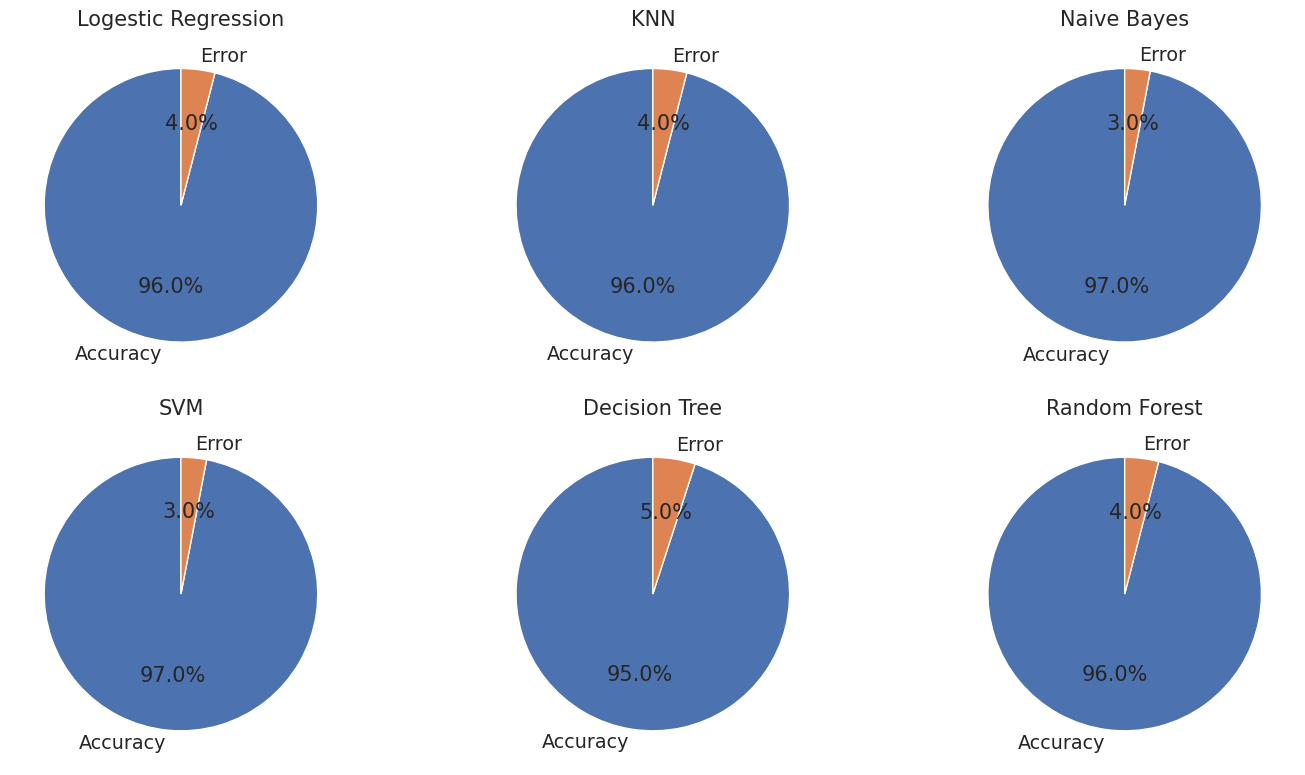

In [ ]:
model_names = ["Logestic Regression", "KNN", "Naive Bayes", "SVM", "Decision Tree", "Random Forest"]
accuracy_values = [0.96, 0.96, 0.97, 0.97, 0.95, 0.96]
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
for i, (model_name, accuracy) in enumerate(zip(model_names, accuracy_values)):
    ax = axs[i // 3, i % 3]
    ax.pie([accuracy, 1 - accuracy], labels=["Accuracy", "Error"], autopct="%1.1f%%", startangle=90)
    ax.set_title(model_name)
plt.tight_layout()
plt.show()


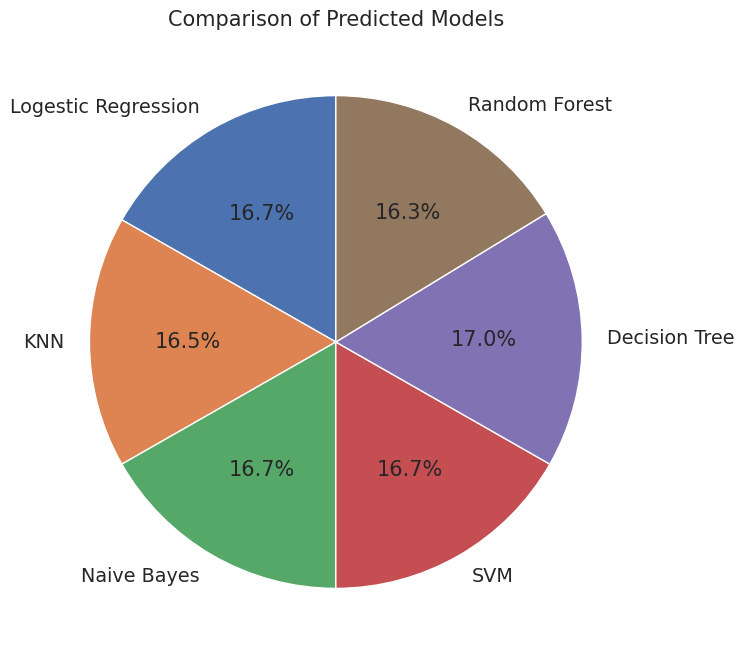

In [ ]:
import matplotlib.pyplot as plt

models = ['Logestic Regression', 'KNN', 'Naive Bayes', 'SVM', 'Decision Tree', 'Random Forest']
accuracy = [0.946667, 0.933333, 0.946667, 0.946667,  0.96 , 0.92]

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(accuracy, labels=models, autopct="%1.1f%%", startangle=90)
ax.set_title("Comparison of Predicted Models")
plt.show()


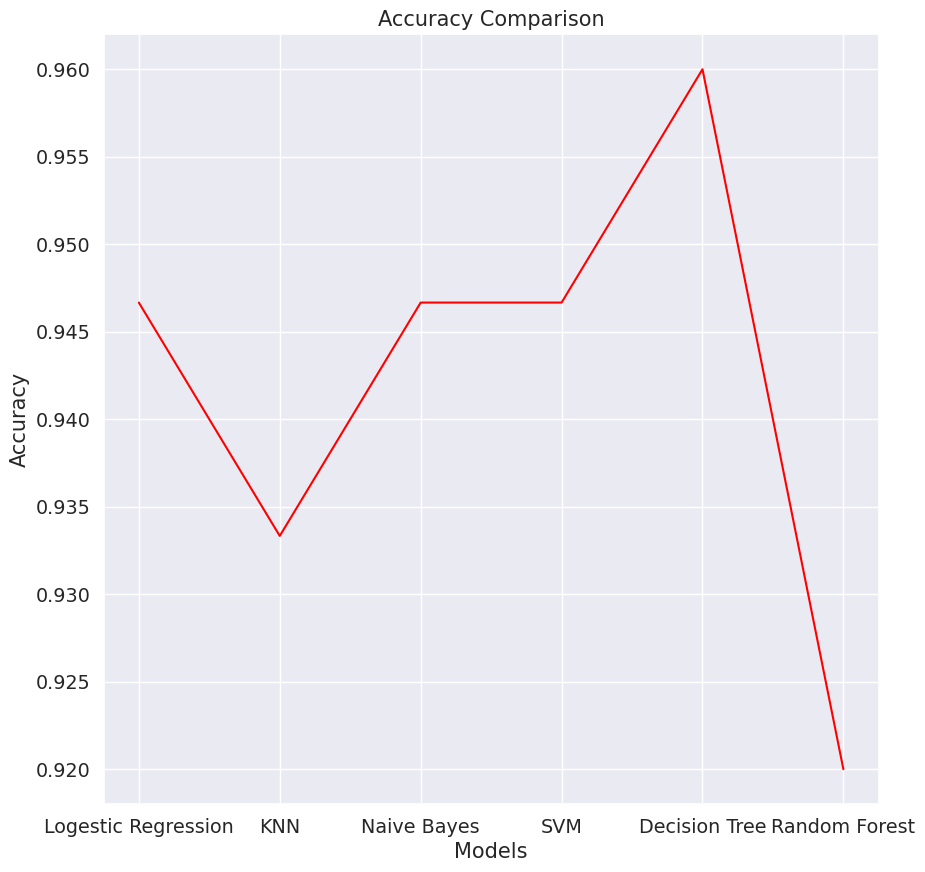

In [ ]:
models = ['Logestic Regression', 'KNN', 'Naive Bayes', 'SVM', 'Decision Tree', 'Random Forest']
accuracy = [0.946667, 0.933333, 0.946667, 0.946667,  0.96 , 0.92]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(models, accuracy, color='red')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison')
plt.show()


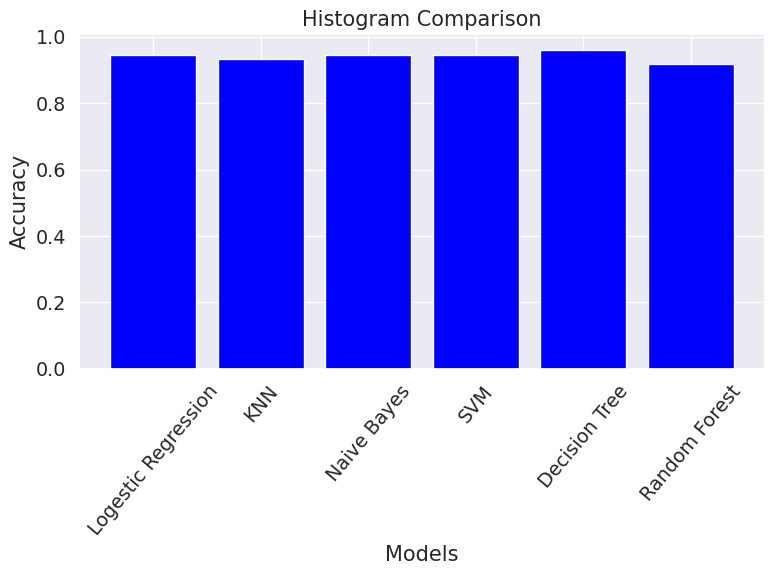

In [ ]:
import matplotlib.pyplot as plt

models = ['Logestic Regression', 'KNN', 'Naive Bayes', 'SVM', 'Decision Tree', 'Random Forest']
accuracy = [0.946667, 0.933333, 0.946667, 0.946667,  0.96 , 0.92]

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(models, accuracy, color='blue')
ax.set_title('Histogram Comparison')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()


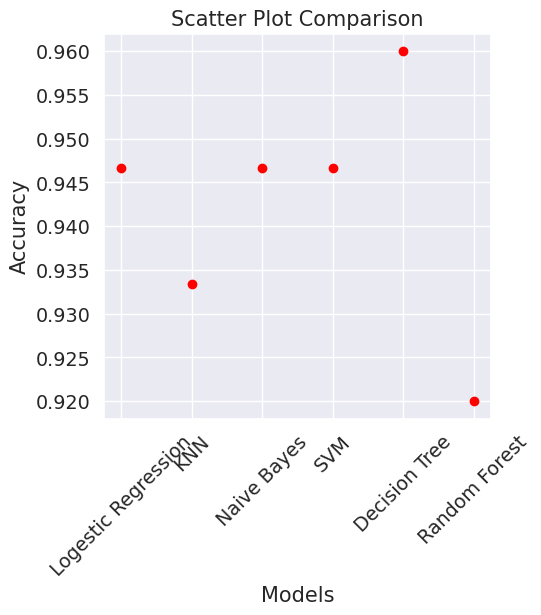

In [ ]:
import matplotlib.pyplot as plt

models = ['Logestic Regression', 'KNN', 'Naive Bayes', 'SVM', 'Decision Tree', 'Random Forest']
accuracy = [0.946667, 0.933333, 0.946667, 0.946667, 0.96 , 0.92]

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(models, accuracy, color='red')
ax.set_title('Scatter Plot Comparison')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()
